# Projeto Indicium - Lighthouse

Candidato: Renato Massamitsu Zama Inomata

## Introdução

Contextualizar problema

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('./dataset/cars_train.csv', sep='\t', encoding='utf_16')

# df['dono_aceita_troca'] = df.dono_aceita_troca.notnull()
# df['veiculo_único_dono'] = df.veiculo_único_dono.notnull()
# df['revisoes_concessionaria'] = df.revisoes_concessionaria.notnull()
# df['ipva_pago'] = df.ipva_pago.notnull()
# df['veiculo_licenciado'] = df.veiculo_licenciado.notnull()
# df['garantia_de_fábrica'] = df.garantia_de_fábrica.notnull()
# df['revisoes_dentro_agenda'] = df.revisoes_dentro_agenda.notnull()
# df['veiculo_alienado'] = df.veiculo_alienado.notnull()


Começaremos importando os pacotes e dados.

Visualizando os dados:

In [2]:
display(df.head(5))
print(f'Tamanho do dataset: {df.shape}')

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


Tamanho do dataset: (29584, 29)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_fotos,29407.0,10.323834,3.487334,8.000000,8.000000,8.000000,14.000000,2.100000e+01
ano_de_fabricacao,29584.0,2016.758552,4.062422,1985.000000,2015.000000,2018.000000,2019.000000,2.022000e+03
ano_modelo,29584.0,2017.808985,2.673930,1997.000000,2016.000000,2018.000000,2020.000000,2.023000e+03
hodometro,29584.0,58430.592077,32561.769309,100.000000,31214.000000,57434.000000,81953.500000,3.900650e+05
num_portas,29584.0,3.940677,0.338360,2.000000,4.000000,4.000000,4.000000,4.000000e+00
veiculo_alienado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preco,29584.0,133023.879880,81662.872247,9869.950645,76571.768462,114355.796998,163679.617425,1.359813e+06


In [5]:
# Verificando se há ids duplicados
df.id.duplicated().sum()

0

## Análise univariável

A seguir, vamos verificar como estão distribuídas as observações de cada uma das features.

### num_fotos

Quantidade de nulos em `num_fotos`: 177 (0.60%)


num_fotos,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
quantidade,19420,728,3,21,147,717,1811,2764,2227,985,248,45,286,5


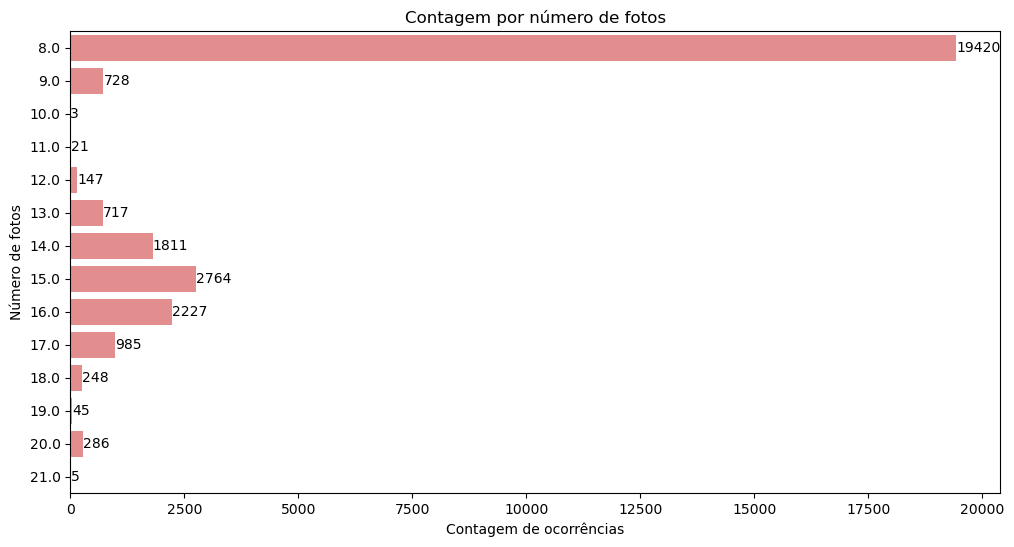

In [6]:
# num_fotos
print(f'Quantidade de nulos em `num_fotos`: {df.num_fotos.isna().sum()} ({df.num_fotos.isna().sum()/df.shape[0] * 100:.2f}%)')
# Verificando a distribuição de número de fotos
display(
    df.num_fotos.value_counts() \
        .reset_index().sort_values('index') \
        .rename(columns={'index':'num_fotos', 'num_fotos':'quantidade'}).set_index('num_fotos').T
)


# Plotagem do gráfico
plt.figure(figsize=(12, 6))
ax = sns.countplot(df.sort_values('num_fotos'), y='num_fotos', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Contagem de ocorrências')
plt.ylabel('Número de fotos')
plt.title('Contagem por número de fotos')
plt.show()


Vamos preencher os valores nulos com zeros e aproveitaremos também para trocar o tipo de `float` para `int`.

In [7]:
df['num_fotos'] = df.num_fotos.fillna(0).astype(int)

,sum,count,mean
num_fotos,,,
0,2.080462e+07,177,117540.25
8,2.642130e+09,19420,136052.02
9,8.864589e+07,728,121766.33
10,1.563761e+05,3,52125.38
11,2.523839e+06,21,120182.82
12,1.759026e+07,147,119661.61
13,8.668262e+07,717,120896.27
14,2.251255e+08,1811,124310.07
15,3.497800e+08,2764,126548.47


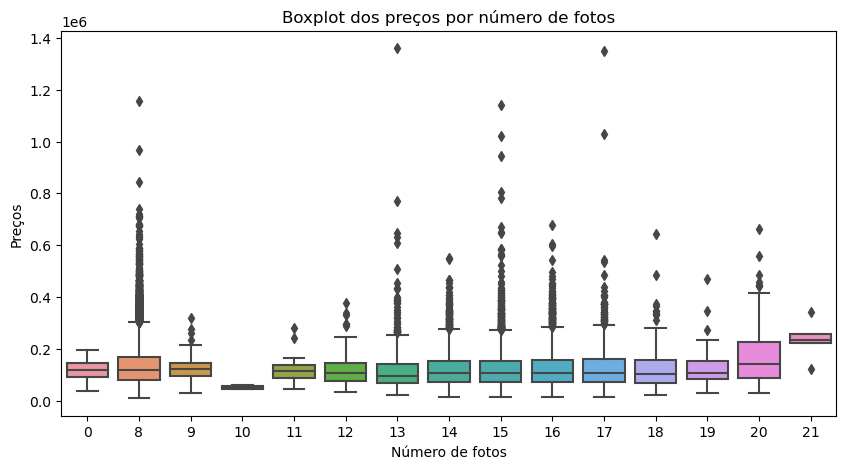

In [8]:
display(
    df.groupby('num_fotos').agg({'preco': ['sum', 'count', 'mean']}).preco.round(2)
)

plt.figure(figsize=(10, 5))
ax = sns.boxplot(df,
    x='num_fotos', y='preco')
# ax.bar_label(ax.containers[0])
plt.xlabel('Número de fotos')
plt.ylabel('Preços')
plt.title('Boxplot dos preços por número de fotos')
plt.show()

### marca, modelo e versao

Vamos realizar uma contagem de veículos vendidos por marca.

Quantidade de veículos vendidos por marca


,VOLKSWAGEN,CHEVROLET,TOYOTA,HYUNDAI,JEEP,FIAT,BMW,AUDI,PEUGEOT,HONDA,MERCEDES-BENZ,FORD,MITSUBISHI,LAND ROVER,RENAULT,NISSAN,KIA,PORSCHE,VOLVO,CITROËN,TROLLER,RAM,CHERY,JAGUAR,MINI,LEXUS,SUZUKI,SUBARU,DODGE,CHRYSLER,SSANGYONG,SMART,ALFA ROMEO,LIFAN,MASERATI,JAC,IVECO,EFFA,FERRARI,BRM
quantidade,4594,3020,2180,2043,2000,1918,1784,1698,1675,1586,1125,1060,862,760,538,438,408,349,287,194,177,168,153,148,137,75,41,41,37,30,14,12,9,8,7,3,2,1,1,1


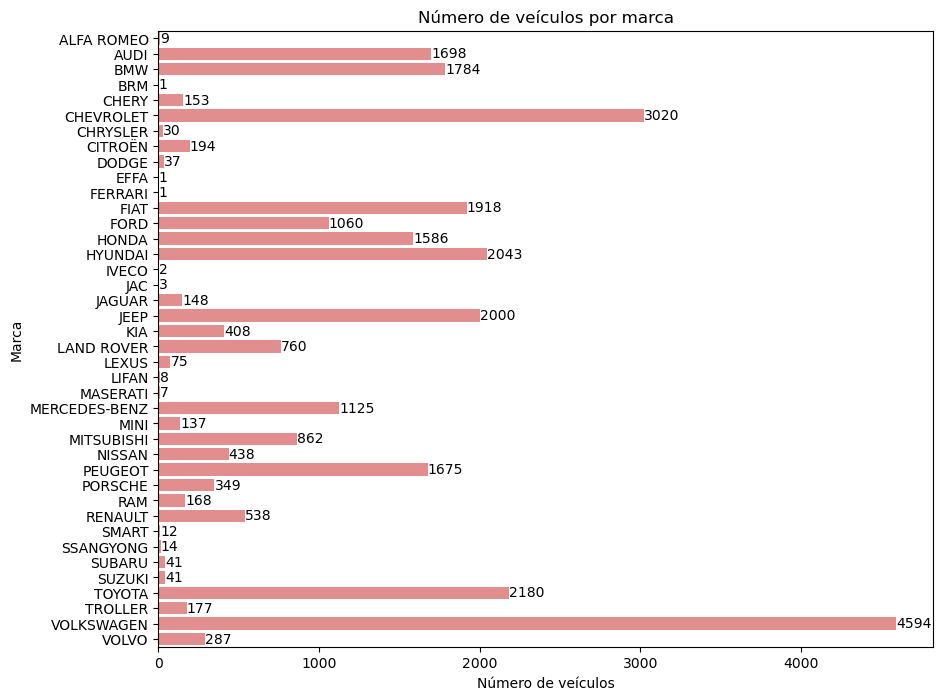

In [9]:
# Verificando a quantidade de veículos por marca em uma data frame horizontal
print('Quantidade de veículos vendidos por marca')
display(df.marca.value_counts().to_frame().T.rename(index={'marca': 'quantidade'}))

# Plotagem do gráfico
plt.figure(figsize=(10, 8))
ax = sns.countplot(df.sort_values('marca'), y='marca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Número de veículos')
plt.ylabel('Marca')
plt.title('Número de veículos por marca')
plt.show()

In [10]:
print('Top 10 modelos mais vendidos')

display(
    df[['marca', 'modelo']].value_counts().to_frame().rename(columns={0: 'quantidade'}).head(10)
)

Top 10 modelos mais vendidos


quantidade
marca      modelo             
JEEP       COMPASS        1480
PEUGEOT    2008           1431
AUDI       Q3              914
FIAT       TORO            902
TOYOTA     COROLLA         867
CHEVROLET  ONIX            855
BMW        320i            822
VOLKSWAGEN AMAROK          725
           GOLF            697
TOYOTA     HILUX           648

In [11]:
print('Top 10 marcas com mais modelos diferentes de carros')

display(
    df.groupby(['marca']).modelo.nunique().sort_values(ascending=False).to_frame().head(10)
)

Top 10 marcas com mais modelos diferentes de carros


,modelo
marca,
MERCEDES-BENZ,74
BMW,50
CHEVROLET,29
VOLKSWAGEN,27
AUDI,24
FIAT,21
HYUNDAI,17
MITSUBISHI,16
FORD,16


In [12]:
print('Top 10 modelos com mais versões diferentes')

display(
    df.groupby(['marca', 'modelo']).versao.nunique().sort_values(ascending=False).to_frame().head(10)
)

Top 10 modelos com mais versões diferentes


versao
marca      modelo          
FORD       ECOSPORT      29
RENAULT    SANDERO       27
HYUNDAI    HB20          26
CHEVROLET  ONIX          25
           S10           25
HONDA      CIVIC         24
AUDI       A3            22
FORD       RANGER        22
VOLKSWAGEN FOX           22
FORD       FIESTA        21

Analisando as marcas, modelos e versões com relação ao preço:

In [13]:
# Sumarizando por marca e marcando os maiores valores do data frame
def highlight_max(element):
    is_max = (element == element.max())
    return ['background: green' if cell == True else '' for cell in is_max]

df.groupby('marca').agg({'preco': ['count', 'sum', 'mean', 'min', 'max']}) \
    .preco.sort_values('sum', ascending=False).round(2) \
    .style.apply(highlight_max)
    # .apply('{:,.2f}'.format)

,count,sum,mean,min,max
marca,,,,,
VOLKSWAGEN,4594,541816761.430000,117940.090000,9869.950000,771701.880000
BMW,1784,357694116.720000,200501.190000,32086.060000,1019840.610000
TOYOTA,2180,340505449.110000,156195.160000,18528.460000,781750.380000
CHEVROLET,3020,281426805.570000,93187.680000,16264.970000,674366.330000
JEEP,2000,276734332.000000,138367.170000,31229.670000,412803.030000
AUDI,1698,271642220.080000,159977.750000,22140.450000,672933.090000
PEUGEOT,1675,205686373.770000,122797.840000,11606.400000,238684.790000
MERCEDES-BENZ,1125,198979624.010000,176870.780000,27882.010000,712798.860000
FIAT,1918,191246013.670000,99711.160000,13642.890000,332809.780000


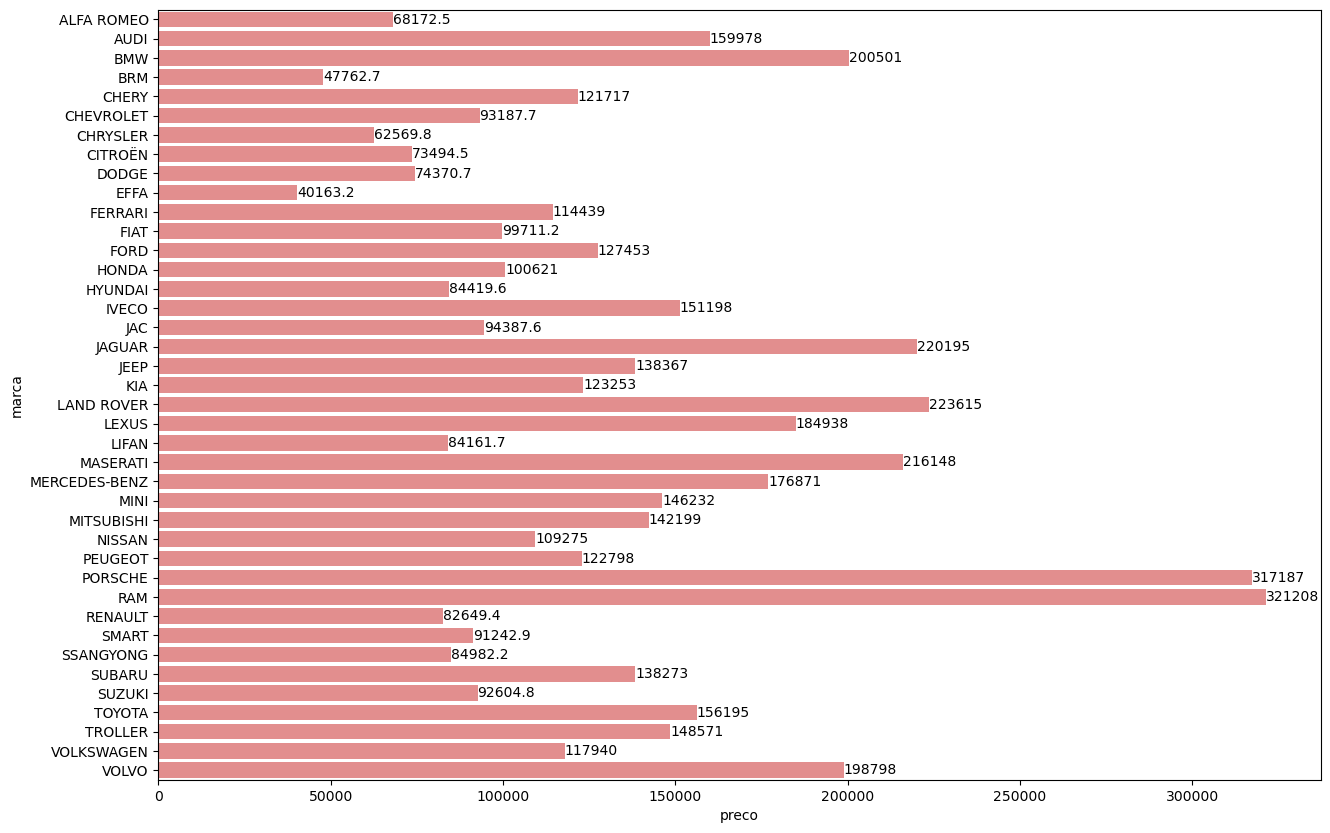

In [14]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(df.groupby('marca').preco.mean().reset_index(), x='preco', y='marca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.show()

### ano_de_fabricacao

Número de nulos da variável `ano_de_fabricacao`: 0
----------------------------------------------------------------
Top 10 anos com mais veículos vendidos


ano_de_fabricacao
2020    4729
2017    4369
2019    3880
2018    3820
2021    2614
2013    2443
2014    2221
2016    1822
2015    1753
2012     509
dtype: int64

----------------------------------------------------------------
Venda dos últimos 10 anos


ano_de_fabricacao
2013    2443
2014    2221
2015    1753
2016    1822
2017    4369
2018    3820
2019    3880
2020    4729
2021    2614
2022      37
dtype: int64

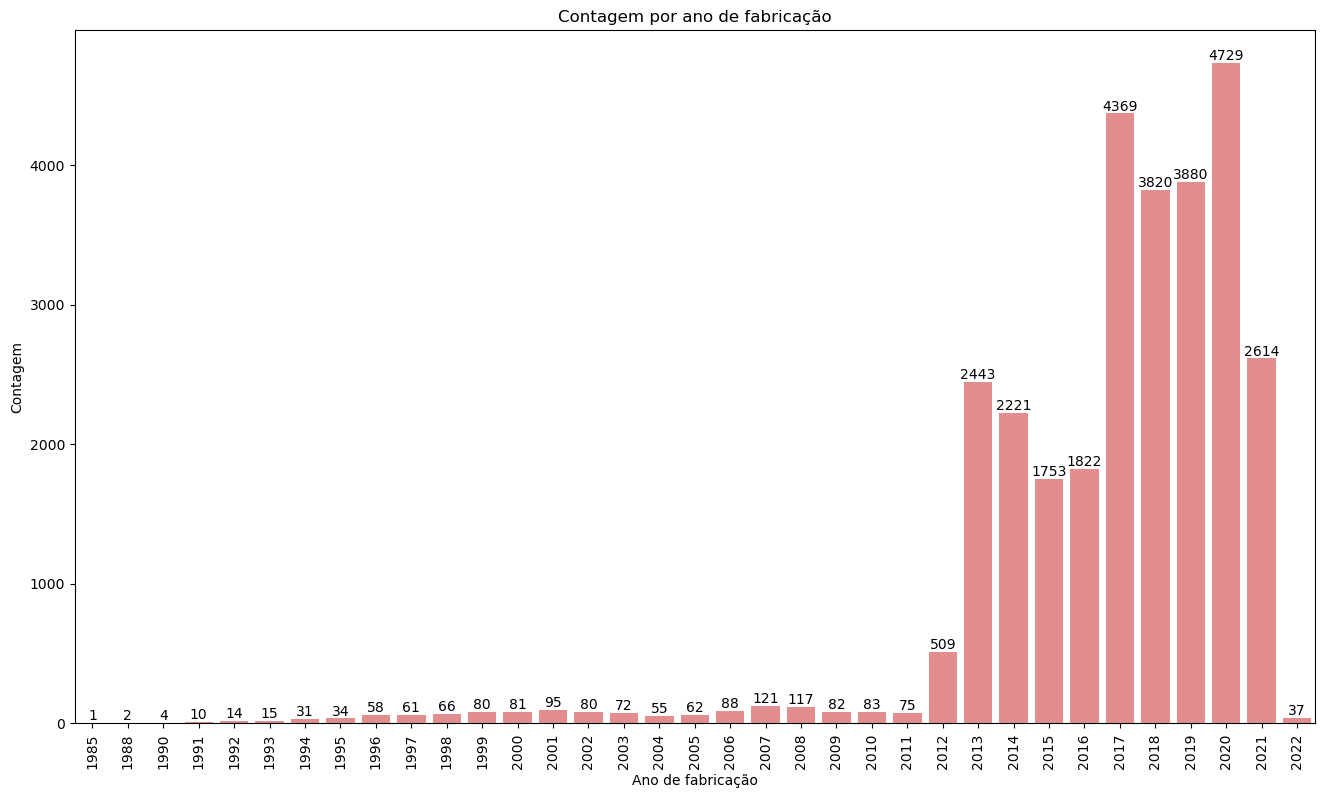

In [15]:
print(f'Número de nulos da variável `ano_de_fabricacao`: {df.ano_de_fabricacao.isna().sum()}')

print('-'*64)

print('Top 10 anos com mais veículos vendidos')
display(
    df.value_counts('ano_de_fabricacao').head(10)
)

print('-'*64)

print('Venda dos últimos 10 anos')
display(
    df.value_counts('ano_de_fabricacao', sort=False).tail(10)
)

plt.figure(figsize=(16,9))
ax = sns.countplot(df, x='ano_de_fabricacao', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Ano de fabricação')
plt.xticks(rotation=90)
plt.title('Contagem por ano de fabricação')
plt.show()

,count,sum,mean,min,max
ano_de_fabricacao,,,,,
2022,37,5447768.528140,147236.987247,46892.300205,398047.499733
2021,2614,371627144.443889,142167.997109,29678.386862,464786.417184
2020,4729,702871216.294558,148629.988643,22935.932232,486869.600468
2019,3880,563045159.596189,145114.731855,20759.094206,1154360.165470
2018,3820,569432874.820397,149066.197597,21414.766620,1349747.711443
2017,4369,596779000.212075,136593.957476,16264.967340,683272.722580
2016,1822,243685996.459392,133746.430549,29400.896326,706087.581723
2015,1753,221918619.617119,126593.622143,14011.654277,1028431.264176
2014,2221,258745833.113343,116499.699736,18729.068307,1359812.892309


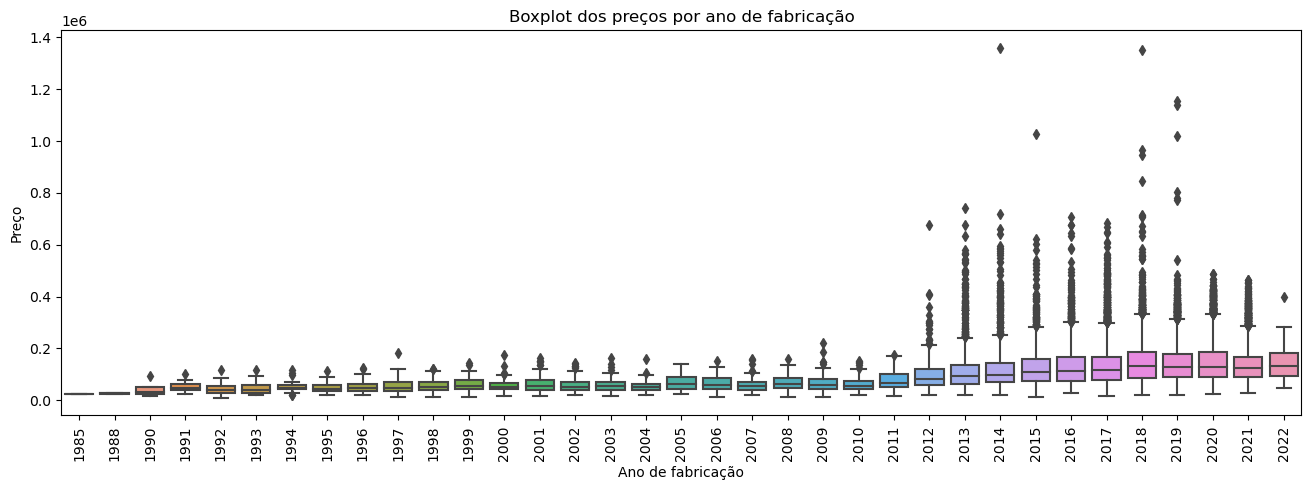

In [16]:
display(
    df.groupby('ano_de_fabricacao').agg({'preco':['count', 'sum', 'mean', 'min', 'max']}) \
        .preco.sort_values('ano_de_fabricacao', ascending=False)\
        .style.apply(highlight_max)
)

plt.figure(figsize=(16, 5))
ax = sns.boxplot(df, x='ano_de_fabricacao', y='preco')
plt.xlabel('Ano de fabricação')
plt.xticks(rotation=90)
plt.ylabel('Preço')
plt.title('Boxplot dos preços por ano de fabricação')
plt.show()


Se acompanharmos a linha da mediana dos boxplots podemos verificar que, em geral, carros de 2012 para 2022 estão vendendo por preços maiores. 

Em média, carros fabricados em 2022 têm o preço de R$ 147.2 mil, enquanto que carros de 2012 custam R$ 97.3 mil, que é aproximadamente 33% menor que os carros mais novos.

### ano_modelo

Número de nulos: 0
----------------------------------------------------------------
Top 10 anos com mais veículos vendidos


ano_modelo
2021.0    5071
2017.0    4519
2018.0    4221
2019.0    3587
2020.0    3541
2015.0    2386
2014.0    2377
2013.0    1212
2016.0     890
2022.0     829
dtype: int64

----------------------------------------------------------------
Vendas dos 10 últimos anos


ano_modelo
2014.0    2377
2015.0    2386
2016.0     890
2017.0    4519
2018.0    4221
2019.0    3587
2020.0    3541
2021.0    5071
2022.0     829
2023.0      15
dtype: int64

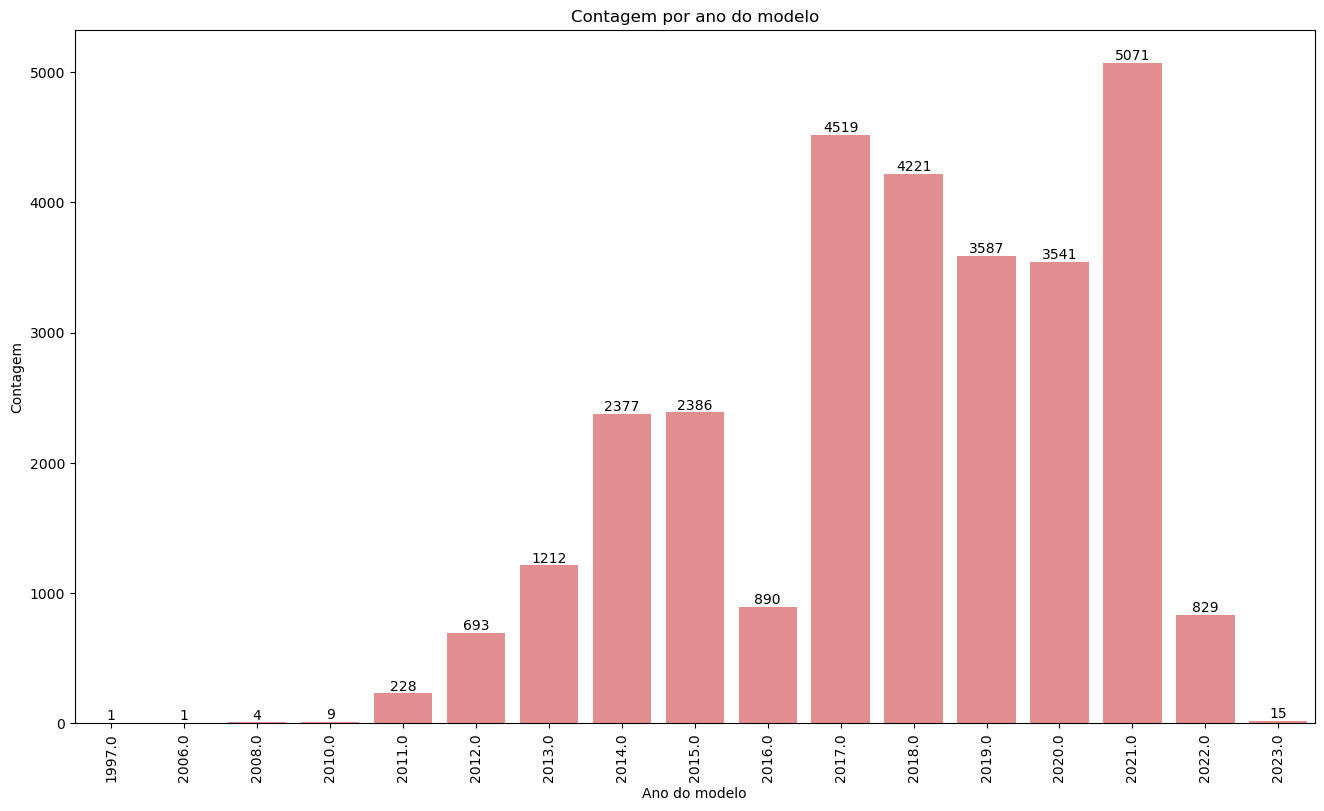

In [17]:
print(f'Número de nulos: {df.ano_modelo.isna().sum()}')

print('-'*64)

print('Top 10 anos com mais veículos vendidos')
display(
    df.value_counts('ano_modelo').head(10)
)

print('-'*64)

print('Vendas dos 10 últimos anos')
display(
    df.value_counts('ano_modelo', sort=False).tail(10)
)

plt.figure(figsize=(16,9))
ax = sns.countplot(df, x='ano_modelo', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Ano do modelo')
plt.xticks(rotation=90)
plt.title('Contagem por ano do modelo')
plt.show()

Vamos realizar um tratamento para transformar a variável de `float` para `int`.

In [18]:
df['ano_modelo'] = df.ano_modelo.astype(int)

,count,mean,median
ano_modelo,,,
2023,15,102862.663284,100054.270443
2022,829,134924.327639,121663.522995
2021,5071,142217.269794,124745.469471
2020,3541,151343.133249,131745.828563
2019,3587,148676.949594,130852.155652
2018,4221,142401.821152,121269.637732
2017,4519,136927.017850,116909.343511
2016,890,128615.596920,108367.464824
2015,2386,116051.103311,106656.333871


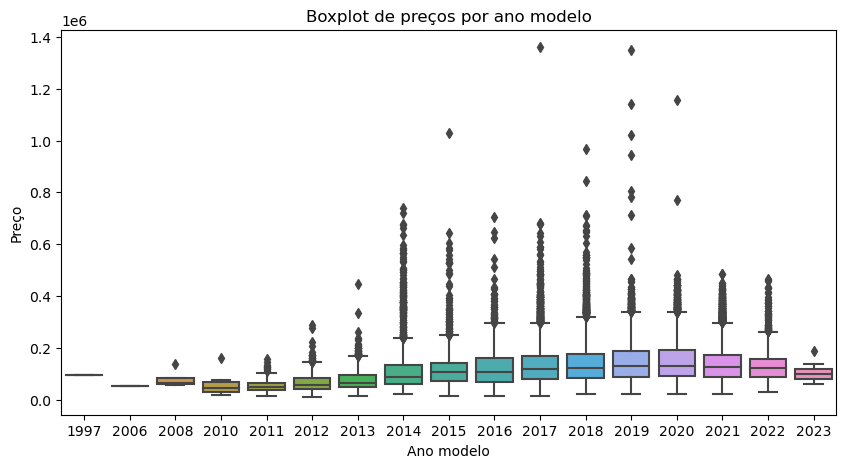

In [94]:
display(
    df.groupby('ano_modelo') \
        .agg({'preco': ['count', 'mean', 'median']}) \
        .preco.sort_index(ascending=False) \
        .style.apply(highlight_max)
)

plt.figure(figsize=(10, 5))
sns.boxplot(df, x='ano_modelo', y='preco')
plt.xlabel('Ano modelo')
plt.ylabel('Preço')
plt.title('Boxplot de preços por ano modelo')
plt.show()

Curiosamente, esperava-se que veículos com ano modelo mais recente teriam preços maiores que veículos mais antigos, porém essa relação não fica bastante explícita uma vez que os carros de 2020 aparentam ser mais caros que os demais.

Além disso, há algum tipo de inconsistência: o menor ano do modelo é 1997 enquanto que o de fabricação é 1988. Vamos verificar:

In [19]:
# Selecionando apenas os veículos que possuem ano de fabricacao menor que 1997
df[df.ano_de_fabricacao < 1997].sort_values('ano_de_fabricacao').head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
590,317058348344627599337634039380150700902,8,VOLKSWAGEN,GOL,1.6 MI POWER 8V FLEX 4P MANUAL G.III,1985,2013,192182.0,Manual,4,Sedã,N,Prata,PF,Pomerode,Rio Grande do Sul (RS),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,22520.067767
13276,51936966583809049009169550364057097722,8,PEUGEOT,307,2.0 GRIFFE 16V GASOLINA 4P AUTOMÁTICO,1988,2011,163780.0,Automática,4,Hatchback,N,Prata,PF,Muzambinho,Rio Grande do Sul (RS),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,24093.833734
19658,64369313258166945961672474305820655846,8,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1988,2011,3548.0,Manual,4,Perua/SW,N,Prata,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,28875.849751
20366,122284606262184123093871909474981352865,8,LAND ROVER,DISCOVERY 3,2.7 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO,1990,2012,106774.0,Automática,4,Sedã,N,Preto,PF,São Caetano do Sul,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,93421.288023
1156,120618350228284858326813530052157947976,16,FIAT,PALIO,1.3 MPI FIRE ELX WEEKEND 8V FLEX 4P MANUAL,1990,2013,171889.0,Manual,4,Hatchback,N,Prata,PJ,Ribeirão Pires,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26669.839995


Pelo apresentado acima, temos um Fusca fabricado em 1988 e modelo 2011 e um Gol Flex fabricado em 1985, [antes mesmo do primeiro carro flex](https://olhardigital.com.br/2023/03/17/carros-e-tecnologia/carro-flex-completa-20-anos-de-estrada-no-brasil-saiba-mais-sobre-a-tecnologia/). 

Percebe-se que exitem algumas inconsistências neste conjunto de dados. Seria interessante comparar qual a diferença em anos entre fabricação e modelo de cada veículo:

In [83]:
# Diferença entre o ano_modelo e ano_de_fabricacao

df['diferenca_ano'] = df.ano_modelo - df.ano_de_fabricacao

display(
    df.value_counts('diferenca_ano').sort_index()
)

diferenca_ano
0     12119
1     14177
2      1767
3       334
4       130
5       119
6        88
7        71
8        62
9        63
10       78
11       80
12       87
13       82
14       68
15       69
16       58
17       40
18       36
19       18
20       15
21       11
22        7
23        4
28        1
dtype: int64

Neste [link](https://autopapo.uol.com.br/noticia/venda-de-carros-usados-ano-modelo-preco-tabela/) é informado que as negociações de veículo são feitas pelo ano modelo. Contudo, podem haver avaliações de veículos que sejam menores quando os modelos são de "duas cabeças", ou seja, quando são produzidas em um ano e o modelo de outro.

In [86]:
display(
    df.groupby('diferenca_ano').agg({'preco': ['count', 'mean', 'median']}).preco
)

,count,mean,median
diferenca_ano,,,
0,12119,140500.700866,120184.714485
1,14177,134778.519605,117191.150956
2,1767,118264.018302,104669.439613
3,334,119750.853878,99906.073248
4,130,79125.030668,63975.841138
5,119,64306.784621,60131.922951
6,88,64265.129829,57004.734772
7,71,60165.452041,53068.364894
8,62,61044.345225,59012.580823


Como esperado, quanto maior a diferença entre anos menor o preço do carro. Talvez essa feature `diferenca_ano` criada possa ser útil na etapa de Machine Learning.


A empresa que recebeu este conjunto de dados precisaria realizar uma investigação mais a fundo sobre essa diferença entre ano modelo e ano fabricação. A princípio estaremos mantendo essas informações, mas seria ao menos interessante compatibilizar as versões dos carros com seus respectivos anos modelos. 

### hodometro

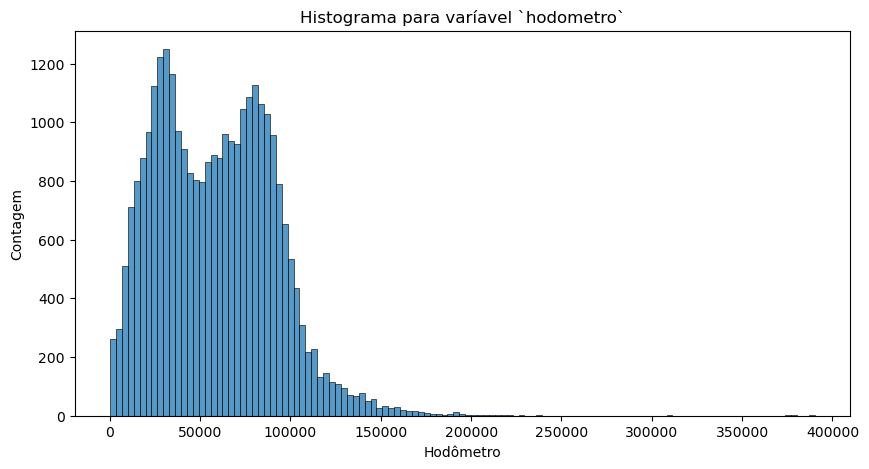

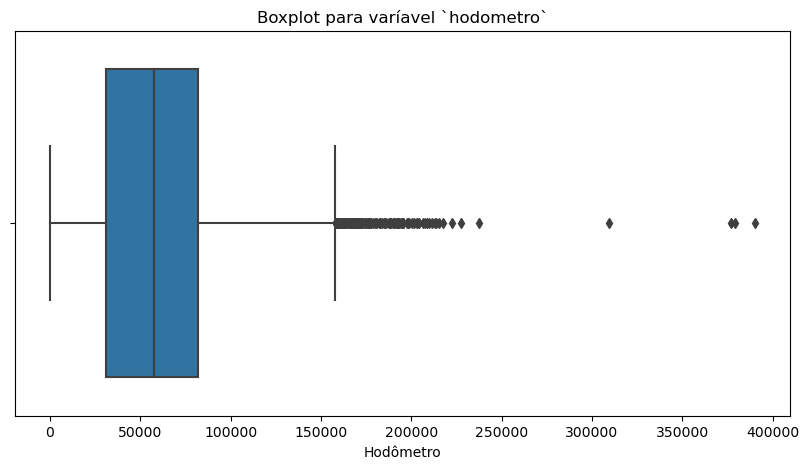

In [22]:
# Valores de hodômetro

plt.figure(figsize=(10, 5))

sns.histplot(df, x='hodometro')
plt.xlabel('Hodômetro')
plt.ylabel('Contagem')
plt.title('Histograma para varíavel `hodometro`')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(df, x='hodometro')
plt.xlabel('Hodômetro')
plt.title('Boxplot para varíavel `hodometro`')
plt.show()

In [23]:
# Verificando os outliers do hodômetro

df.sort_values('hodometro', ascending=False).head(5)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
19895,126955414445370751127432133125076302039,8,FORD,TRANSIT,2.4 FURGÃO LONGO TURBO DIESEL 3P MANUAL,2001,2012,390065.0,Manual,2,Picape,N,Branco,PF,Campinas,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,122236.968801
591,176459444870073105374190357587524594057,8,FIAT,COUPÉ,2.0 16V GASOLINA 2P MANUAL,1997,2012,379155.0,Manual,2,Picape,N,Prata,PF,Santos,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,45647.183036
4960,255524433019265656171123303995467059480,8,FORD,RANGER,2.8 XLT LIMITED 4X4 CD 8V TURBO INTERCOOLER DI...,1991,2013,376712.0,Manual,2,Picape,N,Prata,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,66526.753957
25466,266733556249083435259295458504902452434,8,FORD,RANGER,4.0 STX 4X2 CE V6 12V GASOLINA 2P MANUAL,1994,2012,309465.0,Manual,2,Picape,N,Prata,PF,Serraria,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,47107.361433
25256,264844634239316365552041657795969597881,8,MERCEDES-BENZ,C 180,1.8 CLASSIC PLUS GASOLINA 4P AUTOMÁTICO,1999,2014,237288.0,Automática,4,Sedã,N,Preto,PF,Guarulhos,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,30932.412728


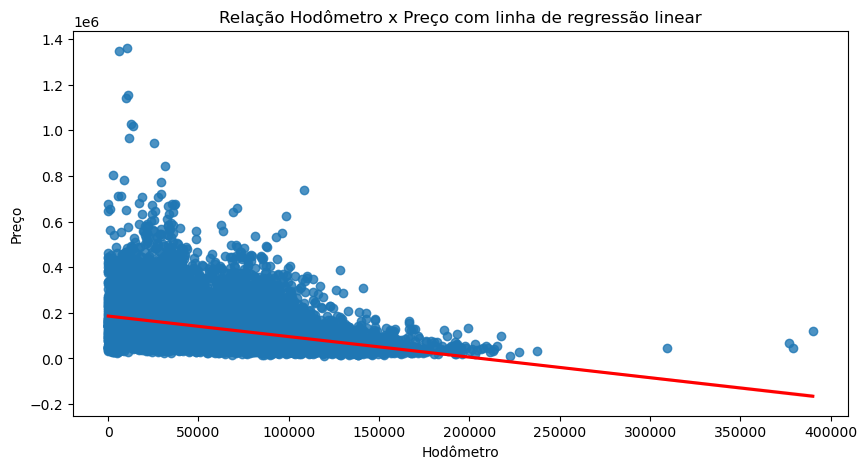

In [100]:
plt.figure(figsize=(10, 5))
sns.regplot(df, x='hodometro', y='preco', line_kws={'color':'red'})
plt.xlabel('Hodômetro')
plt.ylabel('Preço')
plt.title('Relação Hodômetro x Preço com linha de regressão linear')
plt.show()

Esperava-se que um valor maior no hodômetro implica-se num valor menor do preço, e essa relação pode ser verificada pela linha da regressão que está decrescendo.

Vamos verificar como se distribuem os dados quando aplicamos log10 aos valores do hodômetro.

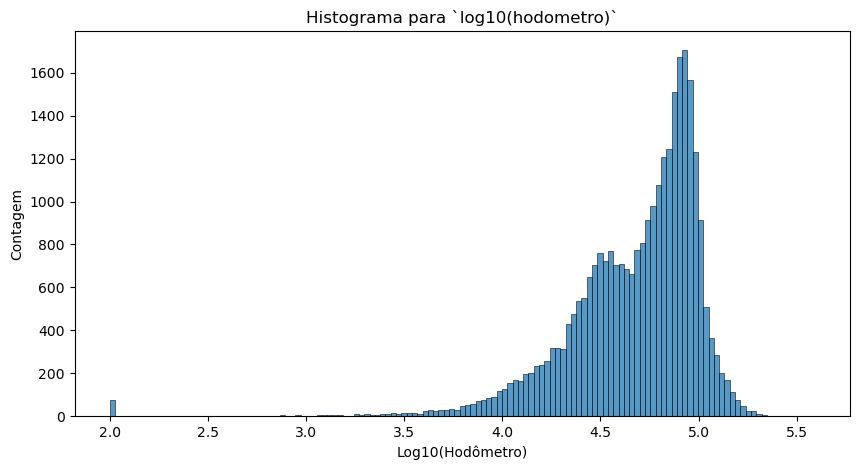

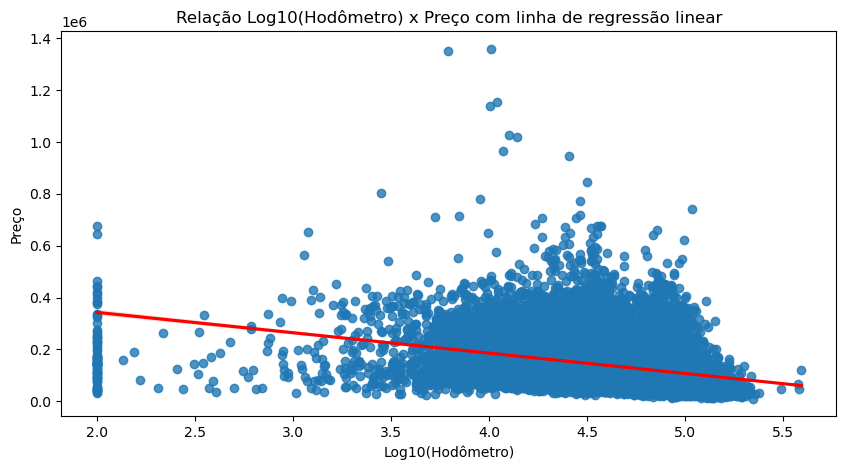

In [110]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['hodometro'].apply(np.log10))
plt.xlabel('Log10(Hodômetro)')
plt.ylabel('Contagem')
plt.title('Histograma para `log10(hodometro)`')
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(x=df['hodometro'].apply(np.log10), y=df['preco'], line_kws={'color':'red'})
plt.xlabel('Log10(Hodômetro)')
plt.ylabel('Preço')
plt.title('Relação Log10(Hodômetro) x Preço com linha de regressão linear')
plt.show()

### cambio

Número de nulos na variável cambio: 0


cambio,Automática,Manual,CVT,Automatizada,Automatizada DCT,Semi-automática,Automática Sequencial
quantidade,22545,4989,1792,139,53,41,25


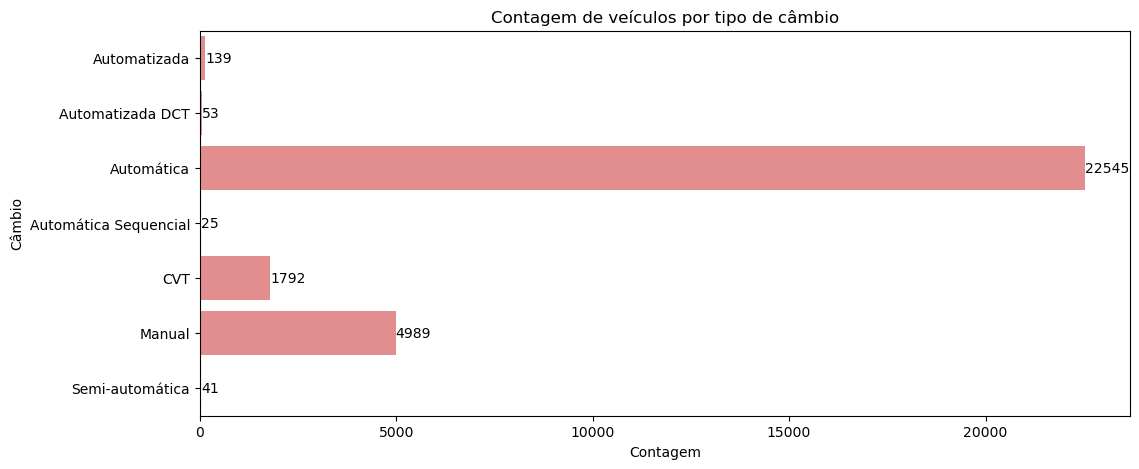

In [24]:
# Variável `cambio`

# Número de nulos
print(f'Número de nulos na variável cambio: {df.cambio.isna().sum()}')

display(
    df.value_counts('cambio').to_frame().rename(columns={0: 'quantidade'}).T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df.sort_values('cambio'), y='cambio', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Contagem')
plt.ylabel('Câmbio')
plt.title('Contagem de veículos por tipo de câmbio')
plt.show()

In [113]:
df.groupby('cambio') \
    .agg({'preco': ['count', 'mean', 'median']}).preco \
    .style.apply(highlight_max)

,count,mean,median
cambio,,,
Automatizada,139,124956.378184,93583.278053
Automatizada DCT,53,205543.578855,183628.260145
Automática,22545,146047.755107,126489.194014
Automática Sequencial,25,57811.436859,46189.893377
CVT,1792,115227.252899,110585.490886
Manual,4989,80713.057565,66962.036722
Semi-automática,41,94124.632794,79101.759184


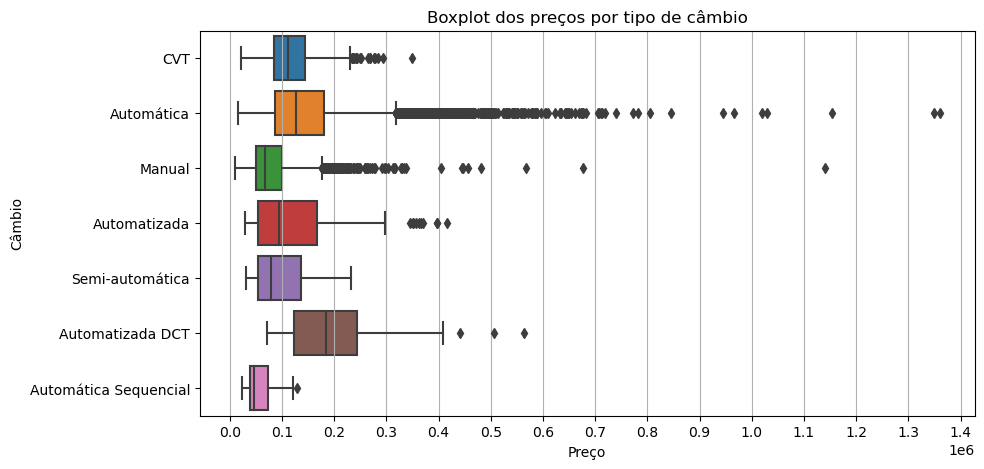

In [130]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, y='cambio', x='preco')
plt.ylabel('Câmbio')
plt.xlabel('Preço')
plt.title('Boxplot dos preços por tipo de câmbio')
plt.xticks(np.arange(0, 1400001, 100000))
plt.grid(True, axis='x')
plt.show()

Como esperado, os valores dos veículos com câmbio manual são menores que os de câmbio automático.

Enquanto as análises estavam sendo realizadas, notei que algumas das versões dos carros apontavam quando o carro era automático. Notei também que alguns deles não condiziam com o câmbio especificado:

In [127]:
df[(df.versao.str.contains('AUTOM')) & (df.cambio.str.contains('Manual'))][['marca', 'modelo', 'versao', 'cambio']]

,marca,modelo,versao,cambio
19,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,Manual
343,JEEP,RENEGADE,1.8 16V FLEX LONGITUDE 4P AUTOMÁTICO,Manual
533,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,Manual
794,HYUNDAI,HB20,1.6 16V FLEX VISION AUTOMÁTICO,Manual
1091,PEUGEOT,2008,1.6 16V FLEX GRIFFE 4P AUTOMÁTICO,Manual
...,...,...,...,...
27592,TOYOTA,HILUX SW4,3.0 SRV 4X4 16V TURBO INTERCOOLER DIESEL 4P AU...,Manual
27875,BMW,M 240i,3.0 24V TURBO GASOLINA 2P AUTOMÁTICO,Manual
28233,CHEVROLET,ONIX,1.0 TURBO FLEX PREMIER AUTOMÁTICO,Manual
28355,PEUGEOT,2008,1.6 16V FLEX CROSSWAY 4P AUTOMÁTICO,Manual


In [128]:
df[(df.versao.str.contains('MANUAL')) & (~df.cambio.str.contains('Manual'))][['marca', 'modelo', 'versao', 'cambio']]

,marca,modelo,versao,cambio
1050,FORD,RANGER,2.5 XLT 4X2 CD 16V FLEX 4P MANUAL,Automática
2666,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática
2833,VOLKSWAGEN,SPACE CROSS,1.6 MI 8V FLEX 4P MANUAL,Semi-automática
4992,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática
5907,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática
7106,MINI,COOPER,1.6 S JOHN COOPER WORKS 16V TURBO GASOLINA 2P ...,Automática
8178,HYUNDAI,HB20,1.6 COMFORT PLUS 16V FLEX 4P MANUAL,Automática
9169,FIAT,MOBI,1.0 EVO FLEX LIKE. MANUAL,Automática
9425,CHEVROLET,SPIN,1.8 LTZ 8V FLEX 4P MANUAL,Automática
10320,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática


Novamente, estaremos mantendo o dataset como está, porém deveria ser verificado como os dados foram coletados.

### num_portas

Número de nulos na variável `num_portas`: 0


num_portas,4,2,3
quantidade,28697,868,19


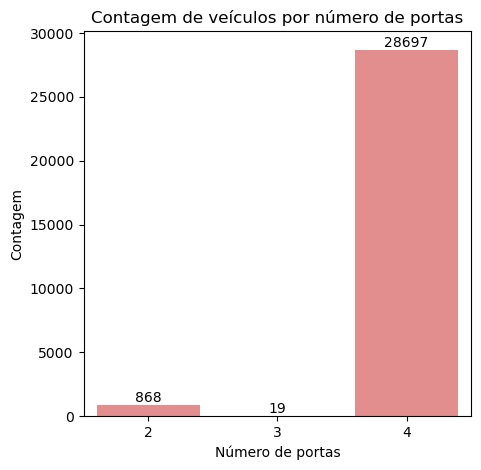

In [25]:
# Variável `num_portas`

print(f'Número de nulos na variável `num_portas`: {df.num_portas.isna().sum()}')

display(
    df.value_counts('num_portas').to_frame().rename(columns={0: 'quantidade'}).T
)

plt.figure(figsize=(5, 5))
ax = sns.countplot(df.sort_values('num_portas'), x='num_portas', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Número de portas')
plt.title('Contagem de veículos por número de portas')
plt.show()

In [26]:
# Vamos verificar os carros com 3 portas
df[df.num_portas == 3]

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
734,63833503557727963117144856024451837146,15,FIAT,DUCATO,2.3 MULTIJET DIESEL MAXICARGO MANUAL,2019,2020,25359.0,Manual,3,Picape,N,Branco,PJ,São José do Rio Preto,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163758.616520
791,52406443374972496219439907843051712946,14,VOLKSWAGEN,SAVEIRO,1.6 CROSS CE 16V FLEX 2P MANUAL,2015,2016,95656.0,Manual,3,Picape,N,Branco,PJ,Guaíba,Rio de Janeiro (RJ),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125619.258582
2047,221840944585208773857515626266413117720,14,MERCEDES-BENZ,CLC 200 K,1.8 KOMPRESSOR 16V GASOLINA 2P AUTOMATICO,1999,2014,153909.0,Automática,3,Picape,N,Prata,PJ,Ribeirão Pires,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,134619.532624
2660,209052999009686863855587096190582220393,8,RENAULT,SANDERO,1.6 16V SCE FLEX STEPWAY MANUAL,2017,2018,80189.0,Manual,3,Picape,N,Branco,PJ,Taboão da Serra,São Paulo (SP),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,61088.508200
4411,208623035278673781563602245202263825307,13,TOYOTA,HILUX,3.0 SRV 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P...,2014,2015,89398.0,Automática,3,Picape,N,Branco,PJ,Rio de Janeiro,Rio de Janeiro (RJ),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,112589.345348
4744,153869601246488237757646603931314191918,13,MERCEDES-BENZ,C 250,2.0 CGI SPORT COUPÉ TURBO 16V GASOLINA 2P AUTO...,2014,2014,90637.0,Automática,3,Picape,N,Branco,PJ,Mairiporã,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,179691.611215
6908,46331204796572079150624384417006192512,16,FIAT,STRADA,1.8 MPI ADVENTURE CD 16V FLEX 2P MANUAL,1996,2012,118596.0,Manual,3,Picape,N,Branco,PJ,Itaiópolis,Acre (AC),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,75417.250896
10280,85845649841718341065084593901278322825,8,CHEVROLET,MONTANA,1.4 MPFI LS CS 8V FLEX 2P MANUAL,2019,2020,45360.0,Manual,3,Picape,N,Branco,PJ,São Paulo,São Paulo (SP),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,51710.916072
14235,317620156821734808464439235055651641438,16,FIAT,STRADA,1.8 MPI ADVENTURE CD 16V FLEX 3P MANUAL,2015,2017,89334.0,Manual,3,Picape,N,Branco,PJ,Rio de Janeiro,Rio de Janeiro (RJ),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52076.709453
14624,16722563716672609784813377714490237093,9,RENAULT,DUSTER OROCH,2.0 16V FLEX DYNAMIQUE 4P MANUAL,2017,2017,88432.0,Manual,3,Picape,N,Branco,PJ,São Paulo do Potengi,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31285.120127


Apesar de realmente existirem alguns [carros com 3 portas](https://globoplay.globo.com/v/3005381/), no dataset percebe-se inconsistência, visto que nos nomes das versões temos veículos com 2 portas, uma vez que possuem `2P` em sua descrição (ex: 1.6 CROSS CE 16V FLEX 2P MANUAL).

In [27]:
df[df.modelo == 'STRADA'].value_counts(['versao', 'num_portas']).to_frame().reset_index().sort_values('versao')

,versao,num_portas,0
4,1.3 FIREFLY FLEX FREEDOM CD MANUAL,4,7
2,1.3 FIREFLY FLEX FREEDOM CS MANUAL,4,39
10,1.3 FIREFLY FLEX FREEDOM CS MANUAL,2,3
5,1.3 FIREFLY FLEX VOLCANO CD MANUAL,4,6
6,1.4 FIRE FLEX ENDURANCE CD MANUAL,4,6
7,1.4 FIRE FLEX ENDURANCE CS MANUAL,4,5
27,1.4 MPI FIRE CE 8V FLEX 2P MANUAL,4,1
30,1.4 MPI FIRE CE 8V FLEX 2P MANUAL,2,1
26,1.4 MPI FIRE CS 8V FLEX 2P MANUAL,2,1
24,1.4 MPI FIRE CS 8V FLEX 2P MANUAL,4,1


Verificando mais de perto, como ilustrado acima, percebe-se que algumas versões estão com números de portas incompatíveis.
Aproveitando a análise do número de portas, vale ressaltar que CS, CE e CD nas descrições provavelmente se referem a, respecitvamente, Cabine Simples, Cabine Estendida e Cabine Dupla.

A seguir, vamos verificar como se correlacionam os preços com a variável `num_portas`.

,count,mean,median
num_portas,,,
2,868,168891.620666,144374.862419
3,19,93896.774876,84390.108227
4,28697,131964.891693,113890.311729


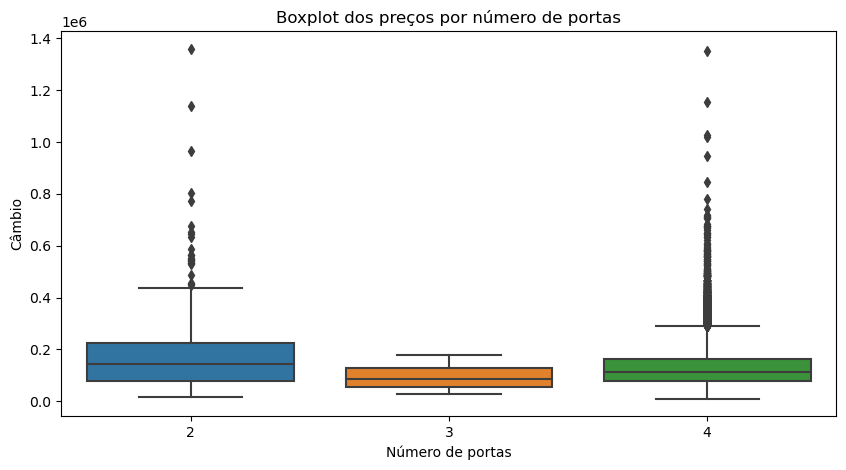

In [137]:
display(
    df.groupby('num_portas') \
        .agg({'preco': ['count', 'mean', 'median']}).preco \
        .style.apply(highlight_max)
)

plt.figure(figsize=(10, 5))
sns.boxplot(df, x='num_portas', y='preco')
plt.ylabel('Câmbio')
plt.xlabel('Número de portas')
plt.title('Boxplot dos preços por número de portas')
plt.show()

A seguir, queremos verificar se, para os carros que possuem modelos com diferentes números de portas, existe algum número específico de portas que resulte em valores maiores.

Para isso, vamos selecionar apenas os carros que possuem modelos com diferentes números de portas, calcularemos a mediana e destacamos em verde os maiores valores por modelo.

In [179]:
nportas = df.groupby(['marca', 'modelo', 'num_portas']).agg({'preco': ['median']}).preco.reset_index()

pd.pivot(nportas[nportas.modelo.duplicated(keep=False)], index=['marca', 'modelo'], columns=['num_portas'], values=['median']) \
    .style.apply(highlight_max, axis=1)

Pelas observações acima, não fica aparente nenhum tipo de relação entre o número de portas e o preço do veículo.

### tipo

Número de nulos da variável `tipo`: 0


tipo,Sedã,Hatchback,Picape,Utilitário esportivo,Perua/SW,Cupê,Minivan
0,16429,4924,4849,3322,27,26,7


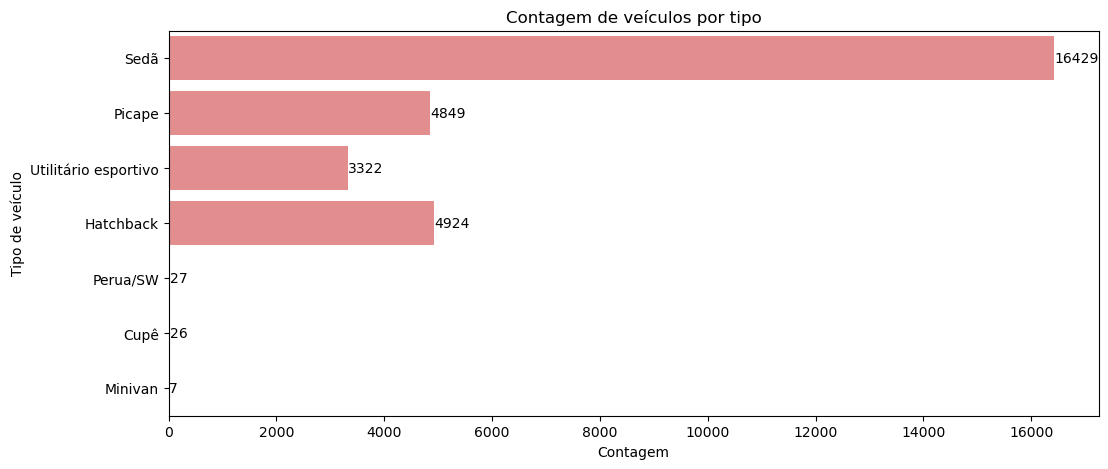

In [28]:
# Variável `tipo`

# Nulos
print(f'Número de nulos da variável `tipo`: {df.tipo.isna().sum()}')

# Contagem
display(
    df.value_counts('tipo').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='tipo', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Tipo de veículo')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por tipo')
plt.show()

Para um mesmo modelo, parece razóavel termos diferentes tipos, como por exemplo o [Ford Ka](https://www.dimasauto.com.br/ford/ford-ka/ford-ka-sedan-ou-hatch/). Contudo, a mesma versão não deveria ter diferentes tipos, conforme o resultado abaixo:

In [29]:
# Printando o data frame para as colunas com SEDAN
def highlight_sedan(value):
    if 'SEDAN' in str(value):
        return 'background-color: green'
    else:
        return ''

df[df.modelo == 'KA'][['marca', 'versao', 'tipo']] \
    .sort_values('versao').drop_duplicates() \
    .style.applymap(highlight_sedan)

,marca,versao,tipo
29409,FORD,1.0 MPI 8V FLEX 2P MANUAL,Picape
16305,FORD,1.0 MPI 8V FLEX 2P MANUAL,Hatchback
9177,FORD,1.0 TI-VCT FLEX SE MANUAL,Picape
9347,FORD,1.0 TI-VCT FLEX SE MANUAL,Hatchback
11350,FORD,1.0 TI-VCT FLEX SE PLUS MANUAL,Hatchback
2900,FORD,1.0 TI-VCT FLEX SE PLUS SEDAN MANUAL,Sedã
18060,FORD,1.0 TI-VCT FLEX SE SEDAN MANUAL,Sedã
27653,FORD,1.0 TI-VCT FLEX SE SEDAN MANUAL,Hatchback
2862,FORD,1.0 TI-VCT FLEX SEL MANUAL,Sedã
16915,FORD,1.0 TI-VCT FLEX TECNO MANUAL,Sedã


Muito pior, temos alguns carros que estão com a versão Sedan porém com tipo diferente, como Hatchback, neste caso.

### blindado

Número de nulos da variável `blindado`: 0


blindado,N,S
0,29336,248


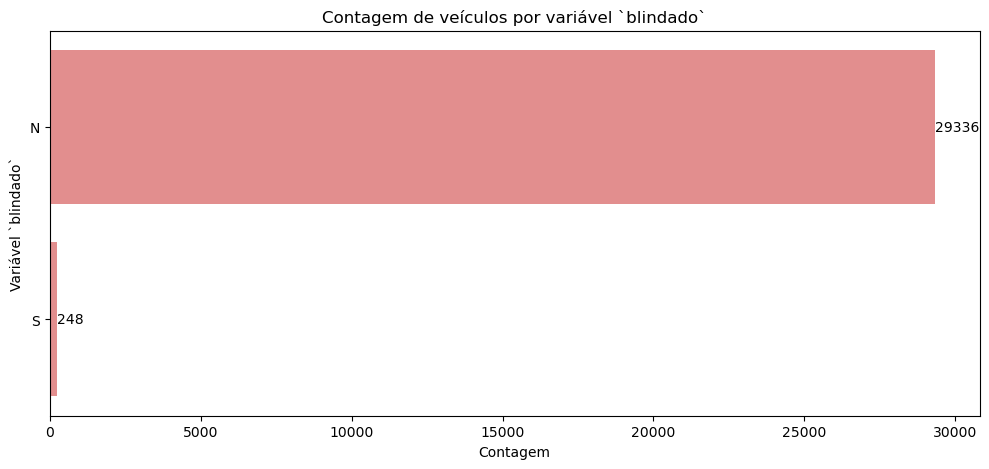

In [30]:
# Variável `blindado`

# Nulos
print(f'Número de nulos da variável `blindado`: {df.blindado.isna().sum()}')

# Contagem
display(
    df.value_counts('blindado').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='blindado', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `blindado`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `blindado`')
plt.show()

Vamos apenas substituir a variável para booleana, onde N: False e S: True.

In [31]:
df['blindado'] = df.blindado.map({'N': False, 'S': True})

### cor

Número de nulos da variável `cor`: 0


cor,Branco,Preto,Prata,Cinza,Dourado,Verde,Vermelho
0,20949,5256,1741,1634,2,1,1


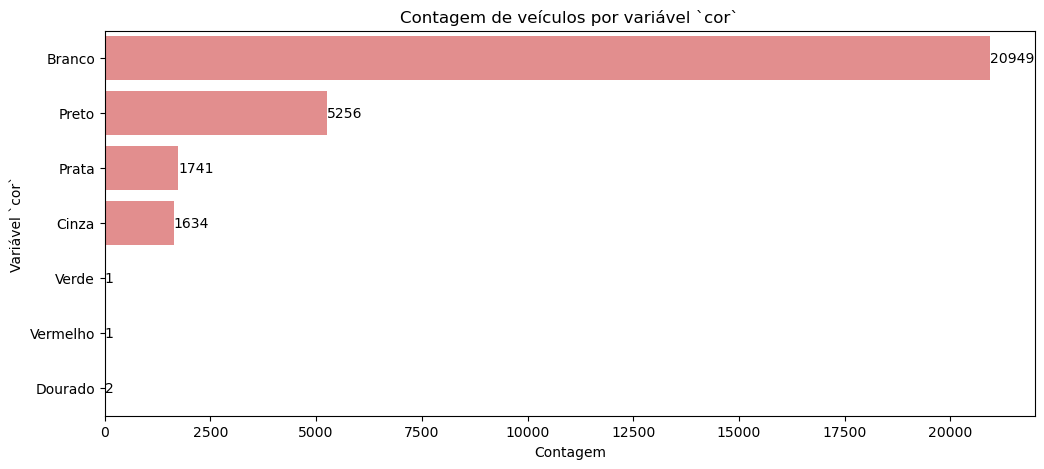

In [32]:
# Variável `cor`

# Nulos
print(f'Número de nulos da variável `cor`: {df.cor.isna().sum()}')

# Contagem
display(
    df.value_counts('cor').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='cor', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `cor`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `cor`')
plt.show()

Curiosamente, pouquíssimos carros coloridos.

### tipo_vendedor

Número de nulos da variável `tipo_vendedor`: 0


tipo_vendedor,PF,PJ
0,17926,11658


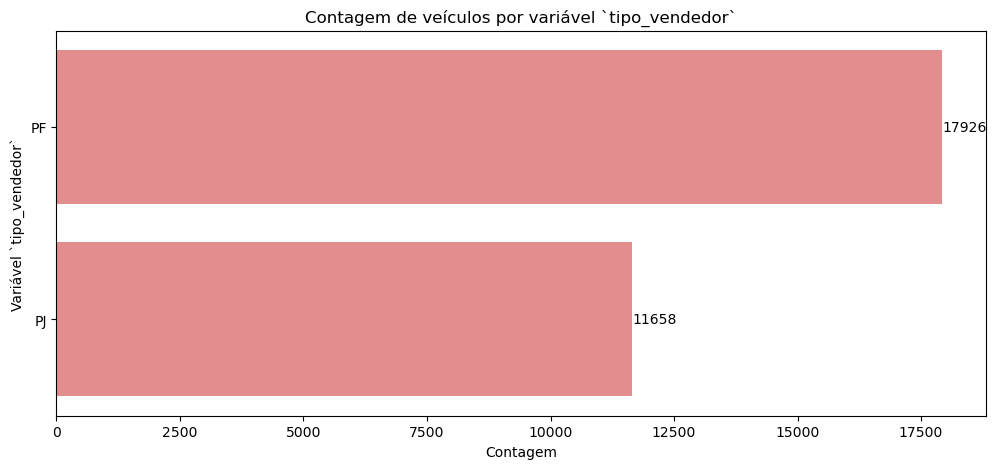

In [33]:
# Variável `tipo_vendedor`

# Nulos
print(f'Número de nulos da variável `tipo_vendedor`: {df.tipo_vendedor.isna().sum()}')

# Contagem
display(
    df.value_counts('tipo_vendedor').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='tipo_vendedor', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `tipo_vendedor`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `tipo_vendedor`')
plt.show()

Vamos transformar essa coluna em booleana e para isso renomearemos também a coluna para `vendedor_PJ`.

In [34]:
df['tipo_vendedor'] = df.tipo_vendedor.map({'PJ': True, 'PF': False})
df.rename(columns={'tipo_vendedor':'vendedor_PJ'}, inplace=True)

### cidade_vendedor e estado_vendedor

In [35]:
# Variável `cidade_vendedor`

# Nulos
print(f'Número de nulos da variável `cidade_vendedor`: {df.cidade_vendedor.isna().sum()}')

print('-'*64)

print('Top 10 cidades com mais vendas')
display(
    df.value_counts('cidade_vendedor').to_frame().head(10)
)

Número de nulos da variável `cidade_vendedor`: 0
----------------------------------------------------------------
Top 10 cidades com mais vendas


,0
cidade_vendedor,
São Paulo,6158
Rio de Janeiro,5793
Belo Horizonte,2172
Presidente Prudente,1536
Goiânia,1396
Medianeira,1197
Campinas,828
São José do Rio Preto,768
Porto Alegre,662


Número de nulos da variável `estado_vendedor`: 0
----------------------------------------------------------------
Top 10 estados com mais vendas


,0
estado_vendedor,
São Paulo (SP),16378
Rio de Janeiro (RJ),2548
Paraná (PR),2526
Santa Catarina (SC),2302
Minas Gerais (MG),1775
Rio Grande do Sul (RS),1646
Goiás (GO),789
Bahia (BA),604
Pernambuco (PE),318


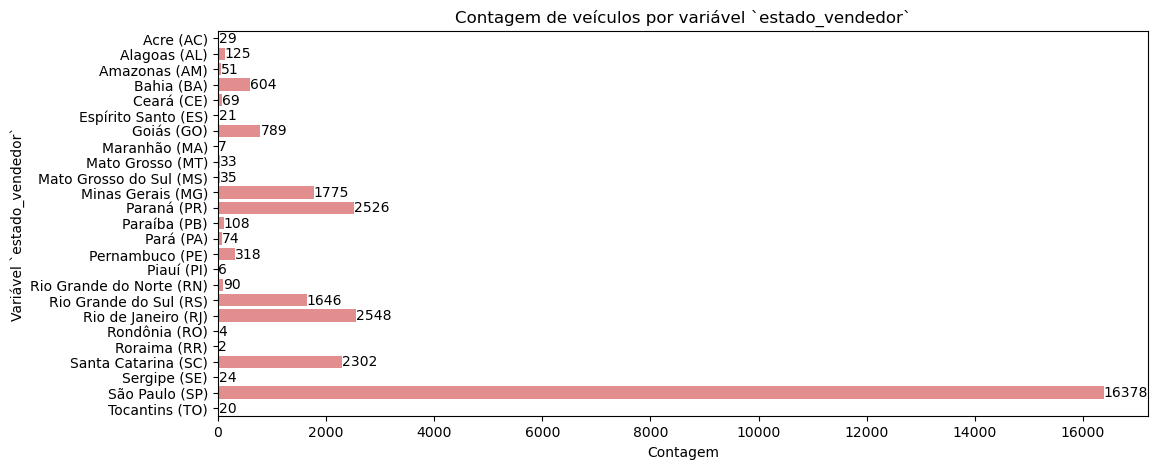

In [36]:
# Variável `estado_vendedor`

# Nulos
print(f'Número de nulos da variável `estado_vendedor`: {df.estado_vendedor.isna().sum()}')

print('-'*64)

print('Top 10 estados com mais vendas')

# Contagem
display(
    df.value_counts('estado_vendedor').to_frame().head(10)
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df.sort_values('estado_vendedor'), y='estado_vendedor', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `estado_vendedor`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `estado_vendedor`')
plt.show()

### anunciante

Número de nulos da variável `anunciante`: 0


anunciante,Pessoa Física,Loja,Concessionária,Acessórios e serviços para autos
0,17999,9879,1702,4


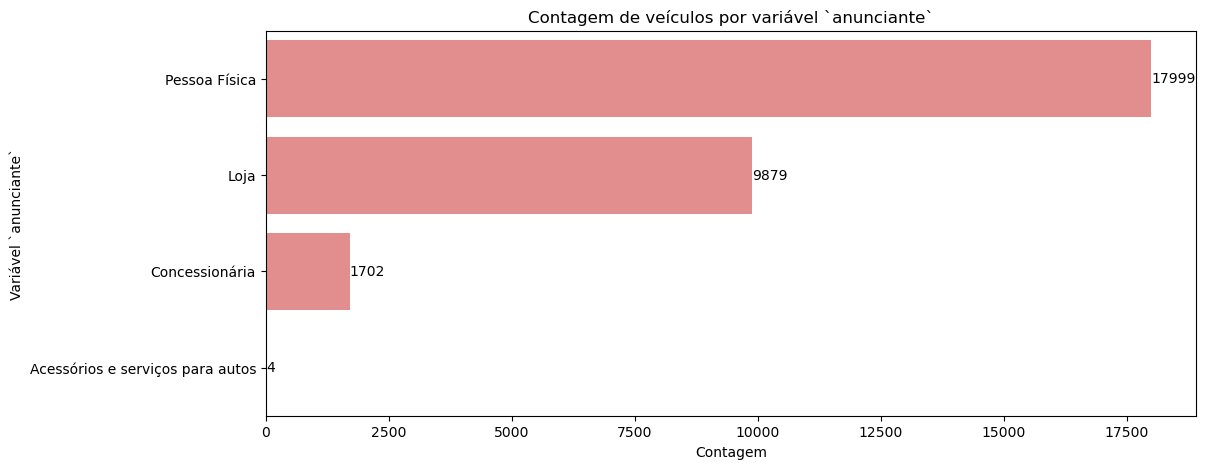

In [37]:
# Variável `anunciante`

# Nulos
print(f'Número de nulos da variável `anunciante`: {df.anunciante.isna().sum()}')

# Contagem
display(
    df.value_counts('anunciante').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='anunciante', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `anunciante`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `anunciante`')
plt.show()

### entrega_delivery

Número de nulos da variável `entrega_delivery`: 0


entrega_delivery,False,True
0,23601,5983


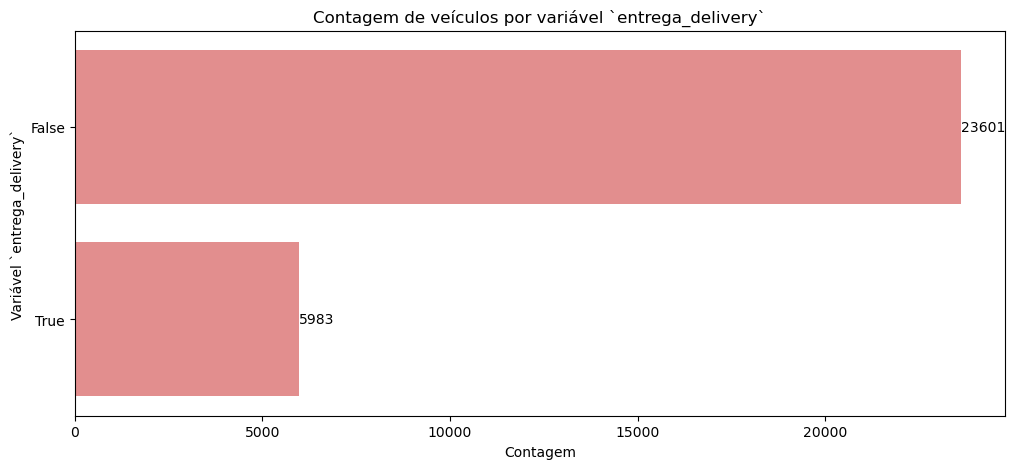

In [38]:
# Variável `entrega_delivery`

# Nulos
print(f'Número de nulos da variável `entrega_delivery`: {df.entrega_delivery.isna().sum()}')

# Contagem
display(
    df.value_counts('entrega_delivery').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='entrega_delivery', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `entrega_delivery`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `entrega_delivery`')
plt.show()

### troca

Número de nulos da variável `troca`: 0


troca,False,True
0,24523,5061


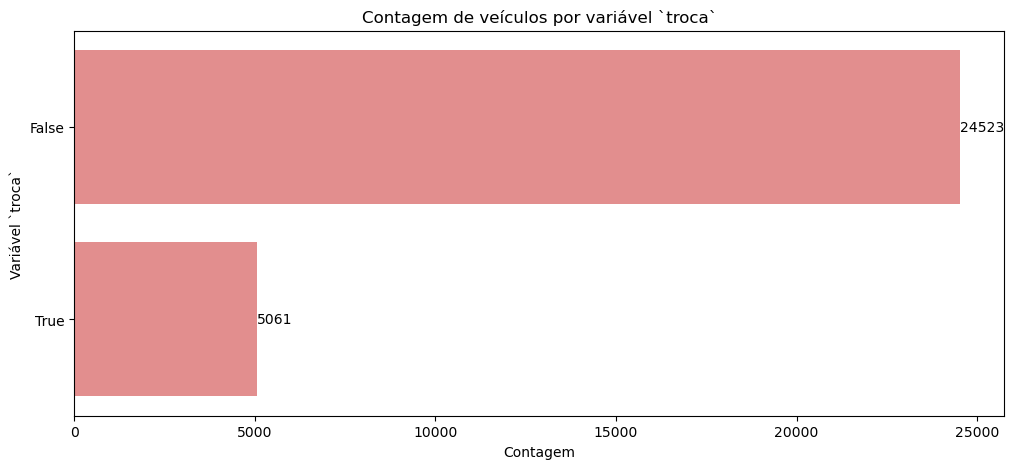

In [39]:
# Variável `troca`

# Nulos
print(f'Número de nulos da variável `troca`: {df.troca.isna().sum()}')

# Contagem
display(
    df.value_counts('troca').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='troca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `troca`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `troca`')
plt.show()

### elegivel_revisao

Número de nulos da variável `elegivel_revisao`: 0


elegivel_revisao,False
0,29584


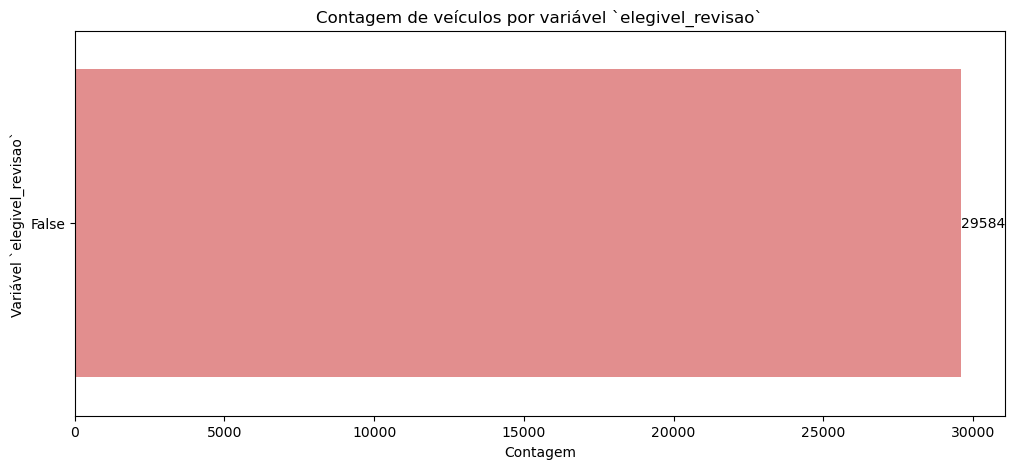

In [40]:
# Variável `elegivel_revisao`

# Nulos
print(f'Número de nulos da variável `elegivel_revisao`: {df.elegivel_revisao.isna().sum()}')

# Contagem
display(
    df.value_counts('elegivel_revisao').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='elegivel_revisao', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `elegivel_revisao`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `elegivel_revisao`')
plt.show()

Número de nulos da variável `dono_aceita_troca`: 7662


dono_aceita_troca,Aceita troca
0,21922


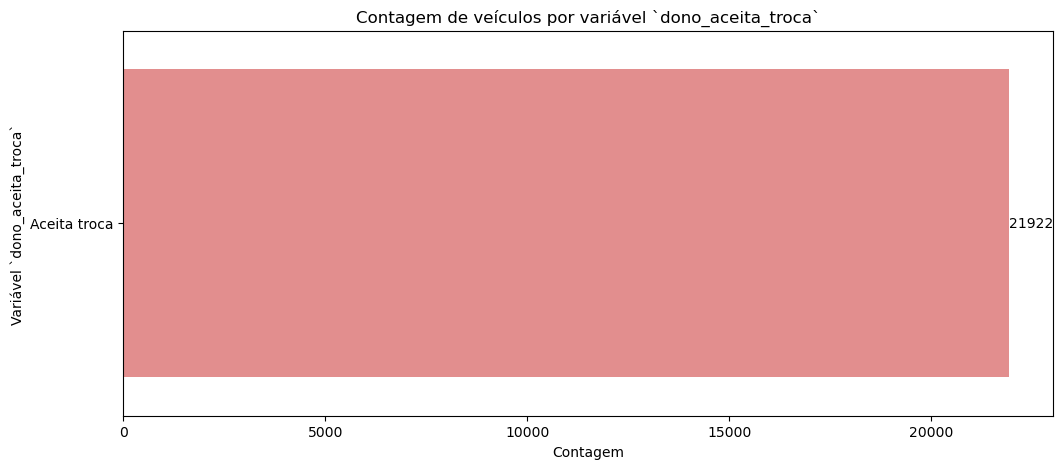

In [41]:
# Variável `dono_aceita_troca`

# Nulos
print(f'Número de nulos da variável `dono_aceita_troca`: {df.dono_aceita_troca.isna().sum()}')

# Contagem
display(
    df.value_counts('dono_aceita_troca').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='dono_aceita_troca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `dono_aceita_troca`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `dono_aceita_troca`')
plt.show()

Número de nulos da variável `veiculo_único_dono`: 19161


veiculo_único_dono,Único dono
0,10423


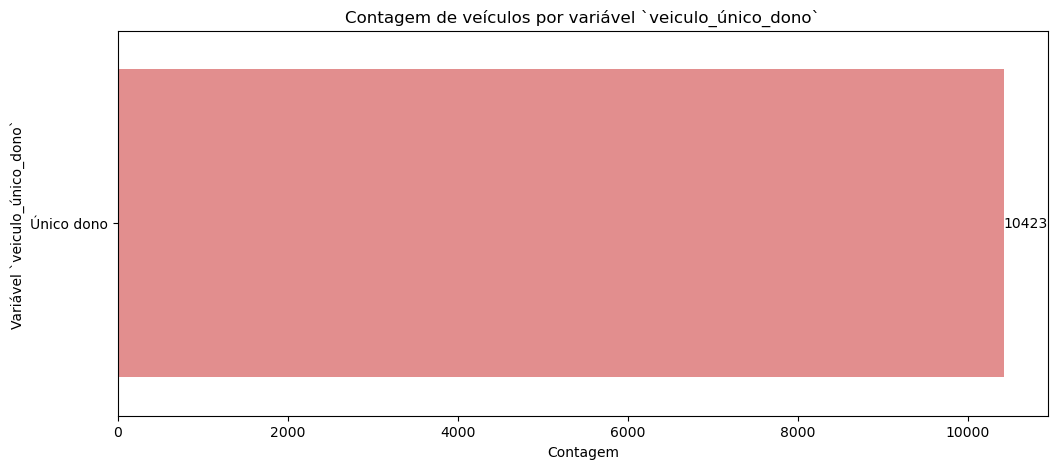

In [42]:
# Variável `veiculo_único_dono`

# Nulos
print(f'Número de nulos da variável `veiculo_único_dono`: {df.veiculo_único_dono.isna().sum()}')

# Contagem
display(
    df.value_counts('veiculo_único_dono').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='veiculo_único_dono', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `veiculo_único_dono`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `veiculo_único_dono`')
plt.show()

Número de nulos da variável `revisoes_concessionaria`: 20412


revisoes_concessionaria,Todas as revisões feitas pela concessionária
0,9172


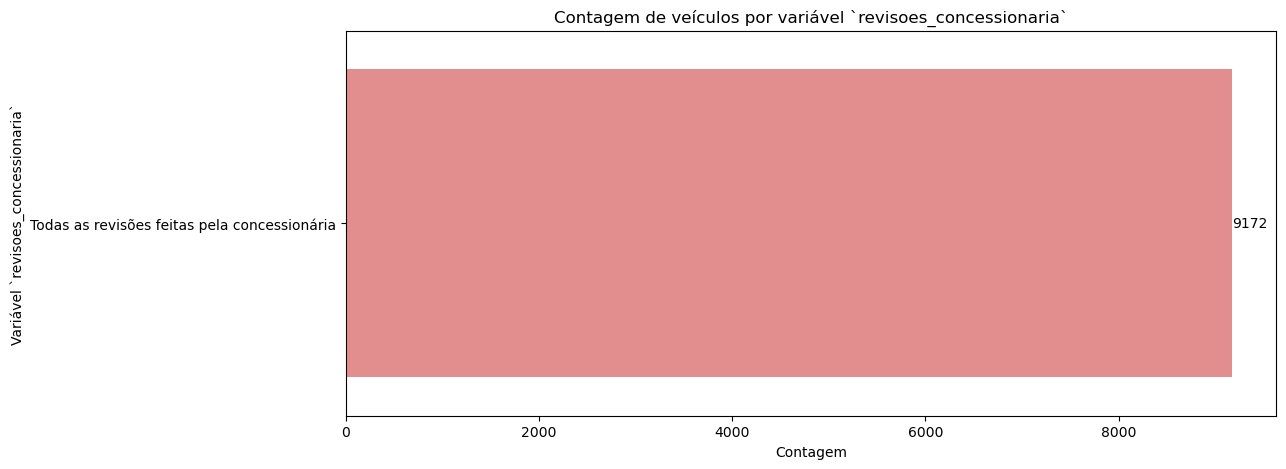

In [43]:
# Variável `revisoes_concessionaria`

# Nulos
print(f'Número de nulos da variável `revisoes_concessionaria`: {df.revisoes_concessionaria.isna().sum()}')

# Contagem
display(
    df.value_counts('revisoes_concessionaria').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='revisoes_concessionaria', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `revisoes_concessionaria`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `revisoes_concessionaria`')
plt.show()

Número de nulos da variável `ipva_pago`: 9925


ipva_pago,IPVA pago
0,19659


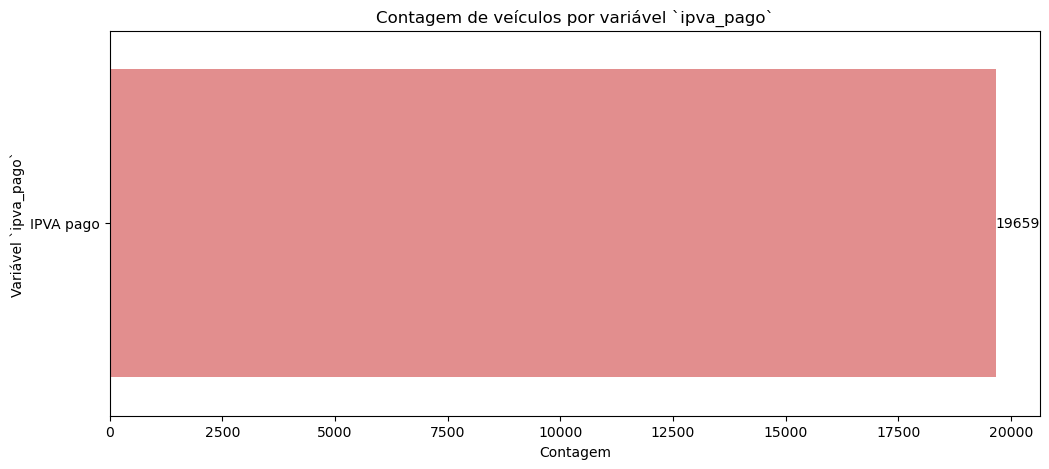

In [44]:
# Variável `ipva_pago`

# Nulos
print(f'Número de nulos da variável `ipva_pago`: {df.ipva_pago.isna().sum()}')

# Contagem
display(
    df.value_counts('ipva_pago').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='ipva_pago', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `ipva_pago`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `ipva_pago`')
plt.show()

Número de nulos da variável `veiculo_licenciado`: 13678


veiculo_licenciado,Licenciado
0,15906


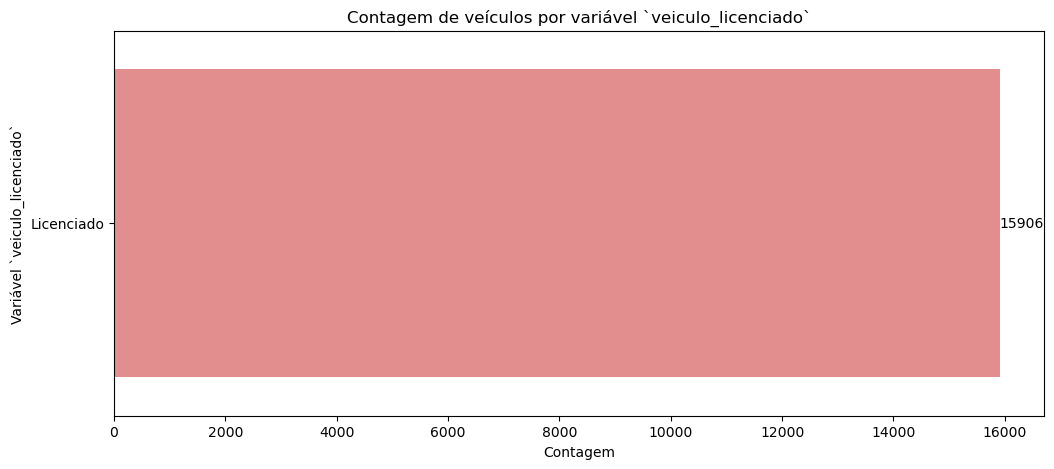

In [45]:
# Variável `veiculo_licenciado`

# Nulos
print(f'Número de nulos da variável `veiculo_licenciado`: {df.veiculo_licenciado.isna().sum()}')

# Contagem
display(
    df.value_counts('veiculo_licenciado').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='veiculo_licenciado', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `veiculo_licenciado`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `veiculo_licenciado`')
plt.show()

Número de nulos da variável `garantia_de_fábrica`: 25219


garantia_de_fábrica,Garantia de fábrica
0,4365


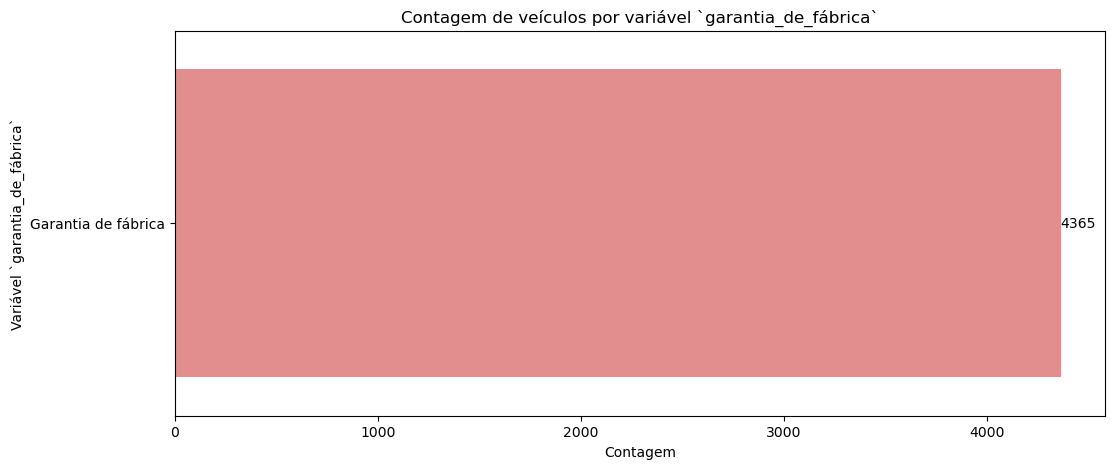

In [46]:
# Variável `garantia_de_fábrica`

# Nulos
print(f'Número de nulos da variável `garantia_de_fábrica`: {df.garantia_de_fábrica.isna().sum()}')

# Contagem
display(
    df.value_counts('garantia_de_fábrica').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='garantia_de_fábrica', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `garantia_de_fábrica`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `garantia_de_fábrica`')
plt.show()

Número de nulos da variável `revisoes_dentro_agenda`: 23674


revisoes_dentro_agenda,Todas as revisões feitas pela agenda do carro
0,5910


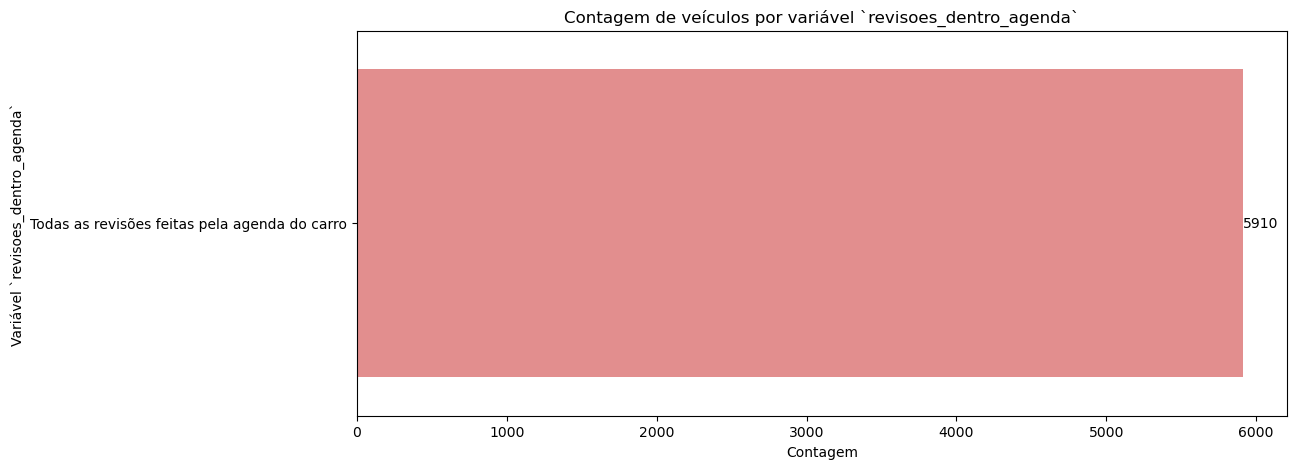

In [47]:
# Variável `revisoes_dentro_agenda`

# Nulos
print(f'Número de nulos da variável `revisoes_dentro_agenda`: {df.revisoes_dentro_agenda.isna().sum()}')

# Contagem
display(
    df.value_counts('revisoes_dentro_agenda').to_frame().T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df, y='revisoes_dentro_agenda', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `revisoes_dentro_agenda`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `revisoes_dentro_agenda`')
plt.show()

In [48]:
# Variável `veiculo_alienado`

# Nulos
print(f'Número de nulos da variável `veiculo_alienado`: {df.veiculo_alienado.isna().sum()}')

# Contagem
display(
    df.value_counts('veiculo_alienado').to_frame().T
)


Número de nulos da variável `veiculo_alienado`: 29584


veiculo_alienado
0


Número de nulos da variável `preco`: 0


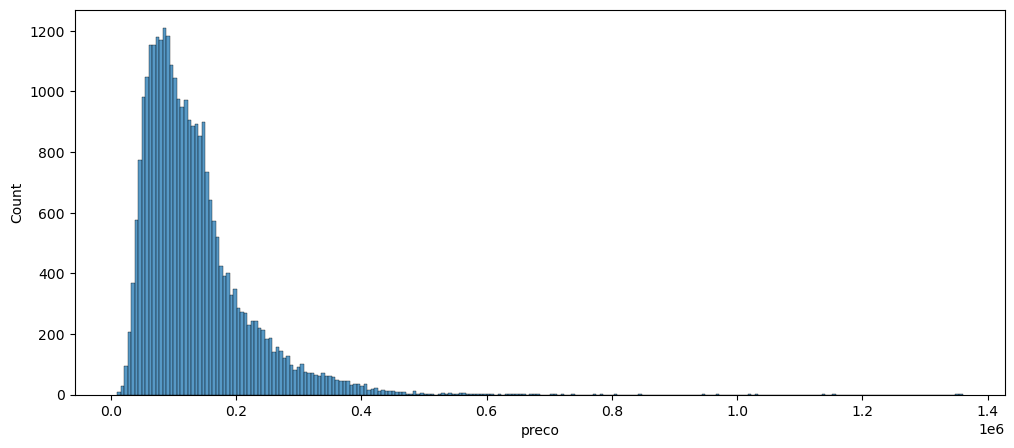

In [49]:
# Variável `preco`

# Nulos
print(f'Número de nulos da variável `preco`: {df.preco.isna().sum()}')

plt.figure(figsize=(12, 5))
ax = sns.histplot(df, x='preco')
# ax.bar_label(ax.containers[0])
# plt.ylabel('Variável `preco`')
# plt.xlabel('Contagem')
# plt.title('Contagem de veículos por variável `preco`')
plt.show()

In [50]:
display(df.sort_values('preco').head())

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,vendedor_PJ,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
3930,301661037804328286615953008015027061532,8,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1992,2012,222321.0,Manual,4,Sedã,False,Prata,False,Jaguaruna,Santa Catarina (SC),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,9869.950645
26359,226619116291182635743624724700616484456,8,PEUGEOT,307,1.6 PRESENCE SEDAN 16V FLEX 4P MANUAL,1998,2012,119731.0,Manual,4,Sedã,False,Preto,False,Osasco,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,11606.398045
5497,301737368863860882436657500276489502131,8,PEUGEOT,207,1.4 XR SPORT 8V FLEX 4P MANUAL,1999,2013,128769.0,Manual,4,Hatchback,False,Preto,False,Brotas,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,13576.401422
18200,279125074222685494207525095206614870117,15,FIAT,PALIO,1.0 MPI FIRE ECONOMY 8V FLEX 2P MANUAL,2008,2012,138482.0,Manual,4,Picape,False,Prata,True,Rio de Janeiro,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13642.891063
16180,72843072145688843461062591189140131966,14,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2015,2015,86105.0,Manual,4,Picape,False,Branco,False,Osasco,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14011.654277


In [51]:
# sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

## Análises com relação ao `preco`